In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
def acc(x,y):
    z = x==y
    return sum(z)/len(z)
    
def draw(step):
    plt.figure(figsize=[6,6])
    plt.title("Label: %i"%y_1.iloc[step])
    plt.imshow(X.iloc[step].values.reshape([28,28]),cmap='gray');

In [27]:
def g(x,c,sigma):
    return np.exp(-sum((x-c)**2)/sigma**2)


def sign(x):
    return 1 if x > 1/2 else 0



def f(x):
    return 1/(1+ np.exp(-x))

def df(x):
    return f(x)*(1-f(x))

class RBF():
    ## n - number_of_rbf
    def __init__(self,X,y,n=50,coef=0.1):
        self.y = y
        self.X = X

        self.w_i_h = np.random.rand(n,X.shape[1])/4
        self.w_h_o = np.random.rand(y.shape[1],n+1)/4
        self.n = n
        self.coef = coef
        self.counter = 1
        self.p_c = coef

    def train(self,step):
       x = self.X.iloc[step]
       y = self.y.iloc[step]
       h_values = f(np.dot(self.w_i_h,x))
       ## bias
       h_values = np.append(h_values,1)
       
       output = f(np.dot(self.w_h_o,h_values))

       e = output - y
       for i in range(self.n):
           s = 0
           for j in range(self.y.shape[1]):
               s += e[j]*df(h_values[i])*self.w_h_o.T[i,j]
           self.w_i_h[i] = self.w_i_h[i] - self.coef*s*x

       for i in range(self.y.shape[1]):
            self.w_h_o[i]= self.w_h_o[i] - self.coef*e[i]*df(np.dot(h_values,self.w_h_o[i]))*h_values
       
    
     

        
    def predict(self,step):
        x = self.X.iloc[step]
        h_values = f(np.dot(self.w_i_h,x))
        h_values = np.append(h_values,1)
        predict = f(np.dot(self.w_h_o,h_values))
        ##print('real output',self.y.iloc[step],sep='\n')
        return predict/sum(predict)


In [28]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = data
y = data['label']
X = data.drop(columns=['label'])/255
y_1 = y

In [30]:
y = pd.get_dummies(y)
y.shape

(42000, 10)

In [31]:
np.random.seed(1)
rbf = RBF(X,y,n=10,coef=0.1)

In [47]:
for i in range(30):
    print(i)
    for j in range(2000):
            rbf.train(j)



0
<ipython-input-27-1614635eee90>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [48]:
j = 10
z = rbf.predict(j)
print('max: ',np.argmax(z))
z

max:  7
<ipython-input-27-1614635eee90>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


array([2.94472014e-04, 2.23570949e-04, 9.74134815e-04, 1.86141806e-01,
       3.65051958e-03, 9.93885956e-03, 6.02763394e-06, 5.23668941e-01,
       4.66960534e-02, 2.28405616e-01])

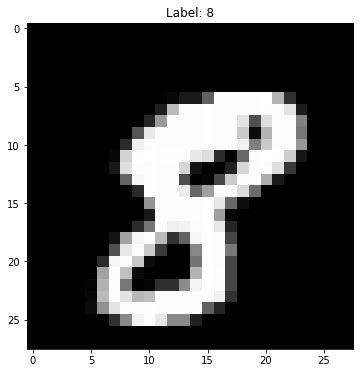

In [49]:
draw(j)

In [50]:
predictions = list()
for i in range(1000):
    predictions.append(np.argmax(rbf.predict(i)))
predictions = np.array(predictions)
acc(predictions,y_1[:1000])


<ipython-input-27-1614635eee90>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


0.673

In [51]:
predictions = list()
for i in range(1000,10000):
    predictions.append(np.argmax(rbf.predict(i)))
predictions = np.array(predictions)
acc(predictions,y_1[1000:10000])

<ipython-input-27-1614635eee90>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


0.6547777777777778